In [6]:
import sys
sys.path.append('../Codes/Kitas_Schools')
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from matplotlib.lines import Line2D
from datetime import datetime, timedelta
import scipy.special as sc
import os.path
import pickle
from matplotlib import style
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from IPython.display import display, Math

def my_linear_func(x, a, b):
    return a + b*x
def my_quadratic_func(x, a, b, c):
    return np.log(a)+np.log(np.sqrt(-b)) + b*(x-c)**2

Text_files_path = '../../../../../Dropbox/Research/Epidemiology_2020/Text_files/Kitas_Schools/'
print(style.available)
#style.use('seaborn-paper')
%autosave 60

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Autosaving every 60 seconds


In [75]:
days = ["mon", "tue", "wed", "thu", "fri", "sat", "sun"]

<ipython-input-100-393f82d8685e>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


(-5.181750000000001, 108.81675000000001)

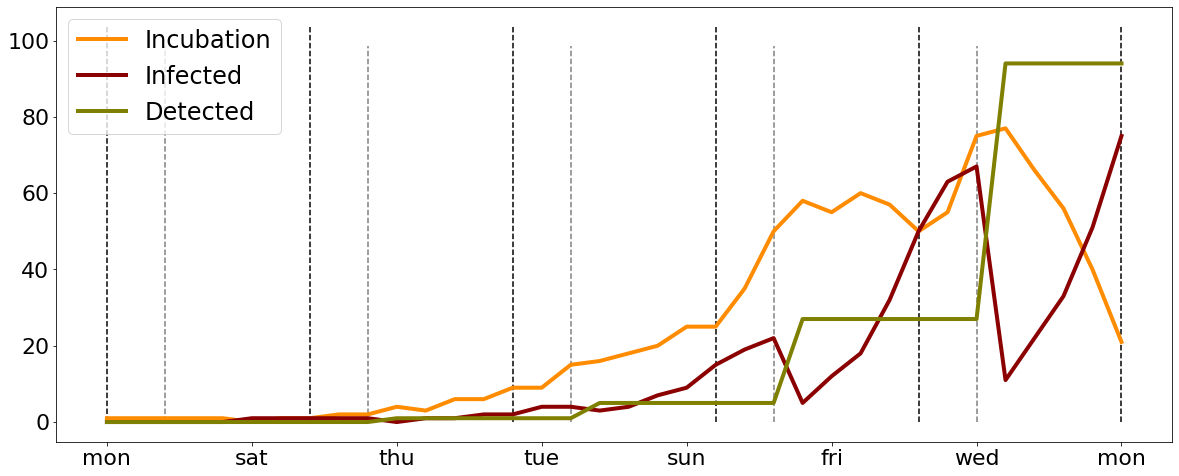

In [100]:
data = np.loadtxt(Text_files_path+"output_1.txt")
h = data[:,0]
inc = data[:,1]
inf = data[:,2]
det = data[:,3]
testing_days = [i for i in range(0,36) if (np.any(np.isin([2], i%7)))]
mondays = [i for i in range(0,36) if (np.any(np.isin([0], i%7)))]

fig, ax = plt.subplots(figsize = (20, 8))
#ax.plot(h, linewidth = 4, color = 'darkgreen', label = 'Healthy')
ax.plot(inc, linewidth = 4, color = 'darkorange', label = 'Incubation')
ax.plot(inf, linewidth = 4, color = 'darkred', label = 'Infected')
ax.plot(det, linewidth = 4, color = 'olive', label = 'Detected')
ax.vlines(testing_days, 0, ax.get_ylim()[1], linestyle = 'dashed', color = 'grey')
ax.vlines(mondays, 0, ax.get_ylim()[1], linestyle = 'dashed', color = 'black')
ax.tick_params(labelsize = 22)
labels = np.array([days[int(i%7)] for i in (ax.get_xticks())])
ax.set_xticklabels(labels)
ax.tick_params(labelsize = 22)
ax.legend(loc = 0, fontsize = 24)
ax.get_ylim()

<ipython-input-101-0c86e447f187>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


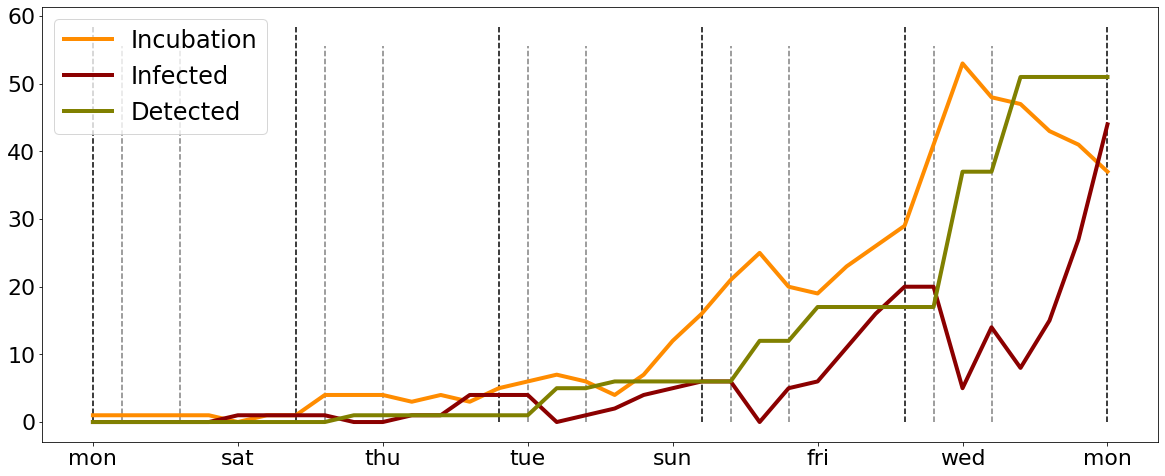

In [101]:
data = np.loadtxt(Text_files_path+"output_2.txt")
h = data[:,0]
inc = data[:,1]
inf = data[:,2]
det = data[:,3]
testing_days = [i for i in range(0,36) if (np.any(np.isin([1,3], i%7)))]
mondays = [i for i in range(0,36) if (np.any(np.isin([0], i%7)))]

fig, ax = plt.subplots(figsize = (20, 8))
#ax.plot(h, linewidth = 4, color = 'darkgreen', label = 'Healthy')
ax.plot(inc, linewidth = 4, color = 'darkorange', label = 'Incubation')
ax.plot(inf, linewidth = 4, color = 'darkred', label = 'Infected')
ax.plot(det, linewidth = 4, color = 'olive', label = 'Detected')
ax.vlines(testing_days, 0, ax.get_ylim()[1], linestyle = 'dashed', color = 'grey')
ax.vlines(mondays, 0, ax.get_ylim()[1], linestyle = 'dashed', color = 'black')
ax.tick_params(labelsize = 22)
labels = np.array([days[int(i%7)] for i in (ax.get_xticks())])
ax.set_xticklabels(labels)
ax.tick_params(labelsize = 22)
ax.legend(loc = 0, fontsize = 24)

<ipython-input-102-34968acbd6d2>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


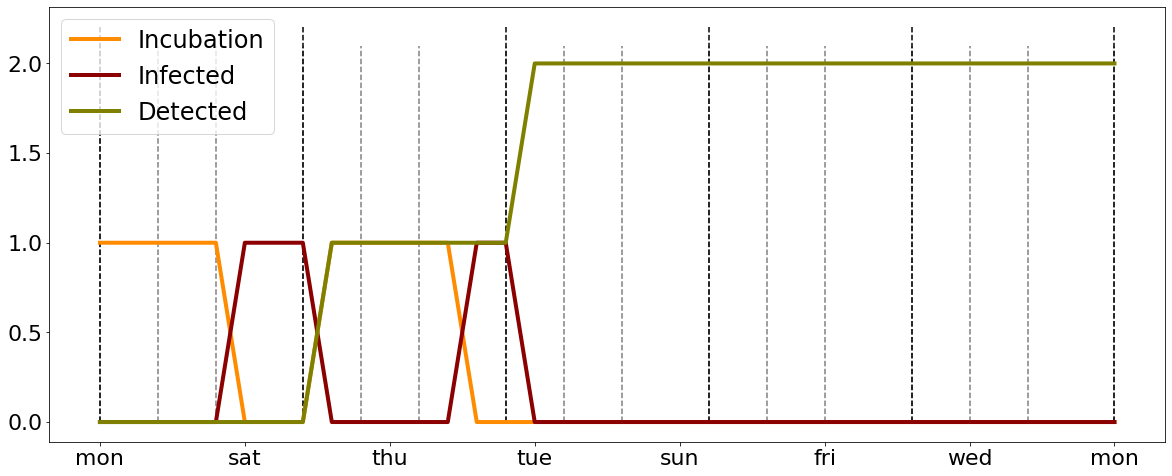

In [102]:
data = np.loadtxt(Text_files_path+"output_3.txt")
h = data[:,0]
inc = data[:,1]
inf = data[:,2]
det = data[:,3]
testing_days = [i for i in range(0,36) if (np.any(np.isin([0, 2, 4], i%7)))]
mondays = [i for i in range(0,36) if (np.any(np.isin([0], i%7)))]

fig, ax = plt.subplots(figsize = (20, 8))
#ax.plot(h, linewidth = 4, color = 'darkgreen', label = 'Healthy')
ax.plot(inc, linewidth = 4, color = 'darkorange', label = 'Incubation')
ax.plot(inf, linewidth = 4, color = 'darkred', label = 'Infected')
ax.plot(det, linewidth = 4, color = 'olive', label = 'Detected')
ax.vlines(testing_days, 0, ax.get_ylim()[1], linestyle = 'dashed', color = 'grey')
ax.vlines(mondays, 0, ax.get_ylim()[1], linestyle = 'dashed', color = 'black')
ax.tick_params(labelsize = 22)
labels = np.array([days[int(i%7)] for i in (ax.get_xticks())])
ax.set_xticklabels(labels)
ax.legend(loc = 0, fontsize = 24)